Ejercicio 1: Análisis estadístico de las distribuciones de aterrizaje y desembarque

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Cargar los datos
datos = np.loadtxt('E7.aterrizajes.txt')

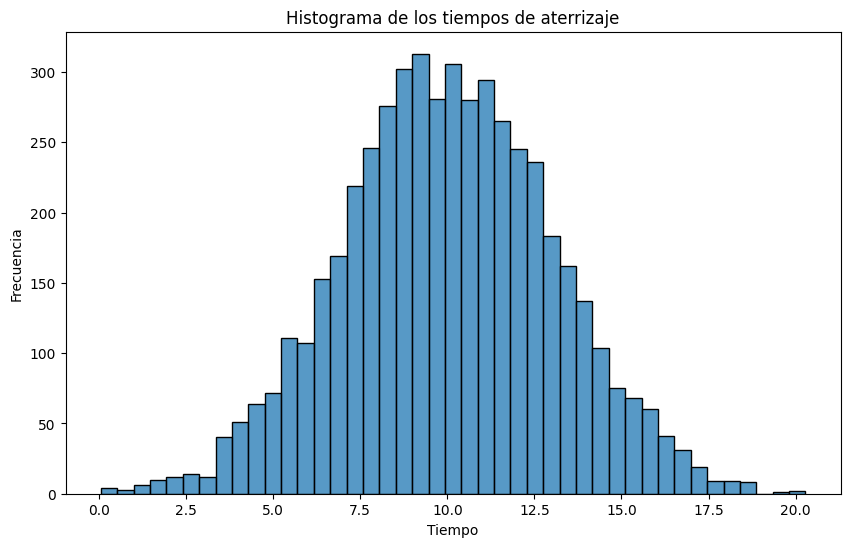

In [2]:
# 2. Visualizar los datos con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(datos)
plt.title('Histograma de los tiempos de aterrizaje')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()

In [3]:
# 3. Pruebas estadísticas

# Prueba de bondad de ajuste de Kolmogorov-Smirnov 
# Compara los datos con una distribución teórica (normal, uniforme o exponencial). De nuevo, si el p-valor es mayor que 0.05, no se rechaza la hipótesis de que los datos siguen esa distribución.

# Prueba de bondad de ajuste para una distribución normal
mu, std = np.mean(datos), np.std(datos, ddof=1)
stat_normal, p_ks_normal = stats.kstest(datos, 'norm', args=(mu, std))
print(f"Prueba KS para normalidad: p-value = {p_ks_normal}")

# Prueba de bondad de ajuste para una distribución uniforme
min_val, max_val = np.min(datos), np.max(datos)
stat_uniforme, p_ks_uniforme = stats.kstest(datos, 'uniform', args=(min_val, max_val - min_val))
print(f"Prueba KS para uniforme: p-value = {p_ks_uniforme}")

# Prueba de bondad de ajuste para una distribución exponencial
loc, scale = stats.expon.fit(datos)
stat_exponencial, p_ks_exponencial = stats.kstest(datos, 'expon', args=(loc, scale))
print(f"Prueba KS para exponencial: p-value = {p_ks_exponencial}")

# 4. Evaluar los resultados
if p_ks_normal > 0.05:
    print("Los datos siguen una distribución normal")
    print(f"Media (mu) = {mu}, Desviación estándar (sigma) = {std}")

elif p_ks_uniforme > 0.05:
    print("Los datos siguen una distribución uniforme")
elif p_ks_exponencial > 0.05:
    print("Los datos siguen una distribución exponencial")
else:
    print("Los datos no parecen seguir ninguna de estas distribuciones")

Prueba KS para normalidad: p-value = 0.6541243104469792
Prueba KS para uniforme: p-value = 1.2771896112165645e-208
Prueba KS para exponencial: p-value = 0.0
Los datos siguen una distribución normal
Media (mu) = 10.007615178514001, Desviación estándar (sigma) = 3.0377002745229005


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import truncnorm, weibull_min, expon

# 1. Cargar los datos
datos = np.loadtxt('E7.desembarques.txt')

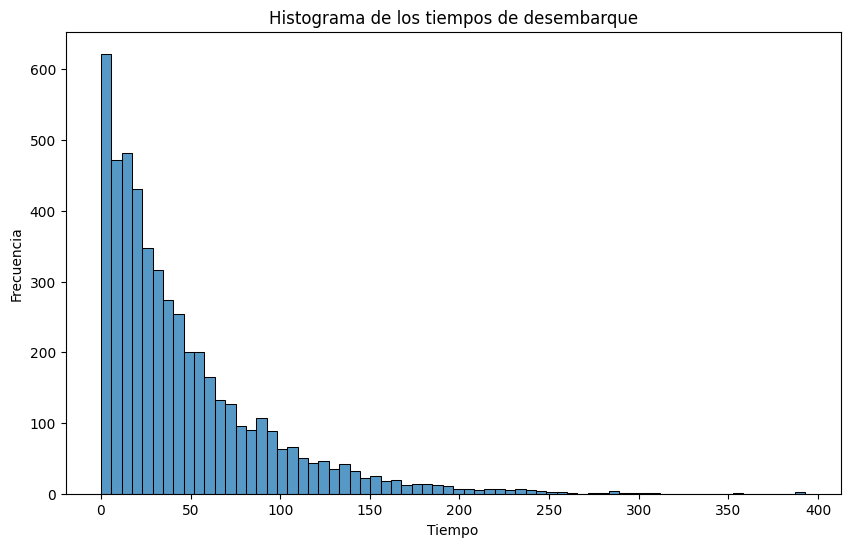

In [3]:
# 2. Visualizar los datos con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(datos)
plt.title('Histograma de los tiempos de desembarque')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()

In [6]:
import numpy as np
from scipy import stats

# Prueba de bondad de ajuste de Kolmogorov-Smirnov 
# Compara los datos con una distribución teórica (normal, uniforme o exponencial). De nuevo, si el p-valor es mayor que 0.05, no se rechaza la hipótesis de que los datos siguen esa distribución.

# a) Prueba de bondad de ajuste para una distribución normal
mu, std = np.mean(datos), np.std(datos)
stat_normal, p_ks_normal = stats.kstest(datos, 'norm', args=(mu, std))
print(f"Prueba KS para normalidad: p-value = {p_ks_normal}")

# b) Prueba de bondad de ajuste para una distribución Weibull
shape_weibull, loc_weibull, scale_weibull = stats.weibull_min.fit(datos)
stat_weibull, p_ks_weibull = stats.kstest(datos, 'weibull_min', args=(shape_weibull, loc_weibull, scale_weibull))
print(f"Prueba KS para Weibull: p-value = {p_ks_weibull}")
print(f"Parámetro shape de Weibull: {shape_weibull}")

# Si el parámetro shape de Weibull es cercano a 1, sugiere que los datos podrían seguir una exponencial.
if np.isclose(shape_weibull, 1, atol=0.05):
    print("La distribución Weibull tiene un shape cercano a 1, lo que sugiere una exponencial.")

# c) Prueba de bondad de ajuste para una distribución exponencial
loc_expon, scale_expon = stats.expon.fit(datos)
lambda_exp = 1 / scale
# lambda_exp = 1/(np.mean)
stat_exponencial, p_ks_exponencial = stats.kstest(datos, 'expon', args=(loc_expon, scale_expon))
print(f"Prueba KS para exponencial: p-value = {p_ks_exponencial}")
print(f"Parámetro loc de la exponencial: {loc_expon}")
print()
# 3. Evaluar los resultados
if p_ks_normal > 0.05:
    print("Los datos siguen una distribución normal")
elif p_ks_exponencial > 0.05:
    print("Los datos siguen una distribución exponencial")
    print(f"Parámetro de tasa (lambda) = {lambda_exp} (es el inverso de la media), Parámetro de escala (theta) = {scale_expon}")
elif p_ks_weibull > 0.05:
    print("Los datos siguen una distribución Weibull")
else:
    print("Los datos no parecen seguir ninguna de estas distribuciones")


Prueba KS para normalidad: p-value = 7.2563433161876315e-112
Prueba KS para Weibull: p-value = 0.8973065847205665
Parámetro shape de Weibull: 0.9897877896220677
La distribución Weibull tiene un shape cercano a 1, lo que sugiere una exponencial.
Prueba KS para exponencial: p-value = 0.739725165931107
Parámetro loc de la exponencial: 0.006979736

Los datos siguen una distribución exponencial
Parámetro de tasa (lambda) = 0.10044207713520997 (es el inverso de la media), Parámetro de escala (theta) = 45.894205510651204


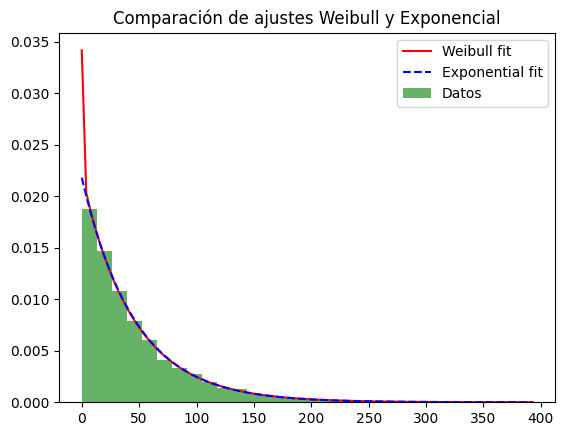

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Comparación entre Weibull y exponencial

# 5. Graficar los histogramas y las distribuciones ajustadas
x = np.linspace(min(datos), max(datos), 100)

# Distribución Weibull ajustada
weibull_pdf = stats.weibull_min.pdf(x, shape_weibull, loc_weibull, scale_weibull)
plt.plot(x, weibull_pdf, 'r-', label='Weibull fit')

# Distribución Exponencial ajustada
exp_pdf = stats.expon.pdf(x, loc_expon, scale_expon)
plt.plot(x, exp_pdf, 'b--', label='Exponential fit')

# Graficar el histograma de los datos originales
plt.hist(datos, bins=30, density=True, alpha=0.6, color='g', label='Datos')

plt.title("Comparación de ajustes Weibull y Exponencial")
plt.legend()
plt.show()
